In [12]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# import
import numpy as np
import matplotlib.pyplot as plt
from cross_validation import *
from build_poly import build_poly

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create a dataset

In [13]:
from standard import standardize 

# number of samples in the dataset
num_data = 1000

# features
x = np.linspace(0.1, 2 * np.pi, num_data)
x = x[:, None]

# observations
offset = 1
noiseLevel = 0.1
y = np.sin(x[:,0]) + offset + noiseLevel * np.random.randn(num_data).T

# standardize 
x, mean_x, std_x = standardize(x)

# build polynomial basis 
degree = 3
phi = build_poly(x, degree)

print('x: ', x.shape)
print('y: ', y.shape)

x:  (1000, 1)
y:  (1000,)


# Test cross validation for Least Square 

Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.112870490652
Mean testing loss:  0.113351470369


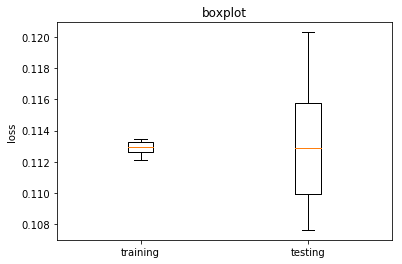

In [4]:
# parameters
arg_ls = dict()
arg_ls['method'] = 'ls'
arg_ls['loss'] = 'rmse'
arg_ls['k_fold'] = 10

# cross validation
w_tr_tot, loss_tr_tot, loss_te_tot = cross_validation(y, phi, arg_ls)

# optimal weights minimize the testing error
w_opt = w_tr_tot[np.argmin(loss_te_tot)]

# plot training and testing losses 
plt.figure
plt.boxplot(np.column_stack((np.array(loss_tr_tot), np.array(loss_te_tot))), labels=['training','testing'])
plt.ylabel('loss')
plt.title('boxplot')
plt.show()

# Test cross validation for Ridge Regression 

Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.85425889985
Mean testing loss:  0.854331120368


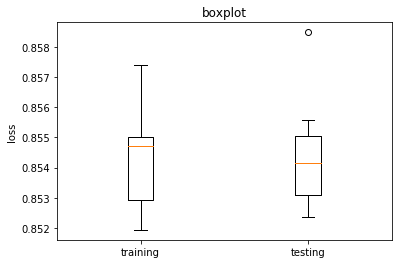

In [5]:
# parameters
arg_rr = dict()
arg_rr['method'] = 'rr'
arg_rr['loss'] = 'rmse'
arg_rr['k_fold'] = 10
arg_rr['lambda_'] = 0.1

# cross validation
w_tr_tot, loss_tr_tot, loss_te_tot = cross_validation(y, phi, arg_rr)

# optimal weights minimize the testing error
w_opt = w_tr_tot[np.argmin(loss_te_tot)]

# plot training and testing losses 
plt.figure
plt.boxplot(np.column_stack((np.array(loss_tr_tot), np.array(loss_te_tot))), labels=['training','testing'])
plt.ylabel('loss')
plt.title('boxplot')
plt.show()

# Test cross validation for Least Squares Gradient Descent

Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Gradient Descent(9/9): loss MSE=0.18714434382673517
Gradient Descent(9/9): loss MSE=0.19037433761050623
Gradient Descent(9/9): loss MSE=0.19152575898525237
Gradient Descent(9/9): loss MSE=0.18734127790316543
Gradient Descent(9/9): loss MSE=0.18966433106960923
Gradient Descent(9/9): loss MSE=0.19020903750233326
Gradient Descent(9/9): loss MSE=0.19209223485376792
Gradient Descent(9/9): loss MSE=0.1908761210884737
Gradient Descent(9/9): loss MSE=0.18992907348951263
Gradient Descent(9/9): loss MSE=0.19098099543609925
Mean training loss:  0.616458577473
Mean testing loss:  0.61588270566


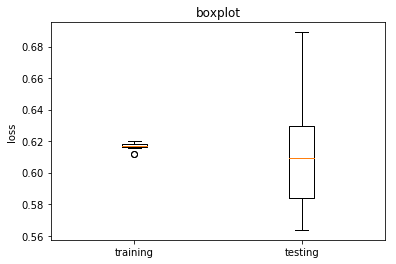

In [9]:
# parameters
arg_lsgd = dict()
arg_lsgd['method'] = 'lsgd'
arg_lsgd['loss'] = 'rmse'
arg_lsgd['k_fold'] = 10
arg_lsgd['gamma'] = 0.1
arg_lsgd['max_iters'] = 10
arg_lsgd['initial_w'] = np.zeros(phi.shape[1])

# cross validation
w_tr_tot, loss_tr_tot, loss_te_tot = cross_validation(y, phi, arg_lsgd)

# optimal weights minimize the testing error
w_opt = w_tr_tot[np.argmin(loss_te_tot)]

# plot training and testing losses 
plt.figure
plt.boxplot(np.column_stack((np.array(loss_tr_tot), np.array(loss_te_tot))), labels=['training','testing'])
plt.ylabel('loss')
plt.title('boxplot')
plt.show()

# Test cross validation for Least Squares Stochastic Gradient Descent

Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Stochastic Gradient Descent(9/9): loss MSE=0.24371734190869263
Stochastic Gradient Descent(9/9): loss MSE=0.1364378918617121
Stochastic Gradient Descent(9/9): loss MSE=0.22701310486180698
Stochastic Gradient Descent(9/9): loss MSE=0.20261444272678142
Stochastic Gradient Descent(9/9): loss MSE=0.21817914321210055
Stochastic Gradient Descent(9/9): loss MSE=0.16156170468761896
Stochastic Gradient Descent(9/9): loss MSE=0.13497683931196883
Stochastic Gradient Descent(9/9): loss MSE=0.15431160287667234
Stochastic Gradient Descent(9/9): loss MSE=0.1428462066306755
Stochastic Gradient Descent(9/9): loss MSE=0.15139203610576768
Mean training loss:  0.62358905181
Mean testing loss:  0.620691345282


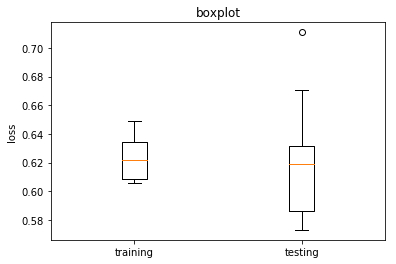

In [10]:
# parameters
arg_lssgd = dict()
arg_lssgd['method'] = 'lssgd'
arg_lssgd['loss'] = 'rmse'
arg_lssgd['k_fold'] = 10
arg_lssgd['gamma'] = 0.1
arg_lssgd['max_iters'] = 10
arg_lssgd['initial_w'] = np.zeros(phi.shape[1])
arg_lssgd['batch_size'] = 25

# cross validation
w_tr_tot, loss_tr_tot, loss_te_tot = cross_validation(y, phi, arg_lssgd)

# optimal weights minimize the testing error
w_opt = w_tr_tot[np.argmin(loss_te_tot)]

# plot training and testing losses 
plt.figure
plt.boxplot(np.column_stack((np.array(loss_tr_tot), np.array(loss_te_tot))), labels=['training','testing'])
plt.ylabel('loss')
plt.title('boxplot')
plt.show()

# Test cross validation for logistic regression

Number of samples in total:  1000
Number of folds:  5  of 200 samples.
Logistic Regression (49/49): loss logLikelihood=551.1580897851068
Logistic Regression (49/49): loss logLikelihood=551.1912171381596
Logistic Regression (49/49): loss logLikelihood=551.2029116231628
Logistic Regression (49/49): loss logLikelihood=551.2002655653845
Logistic Regression (49/49): loss logLikelihood=551.226658165167
Mean training loss:  551.195828455
Mean testing loss:  137.800055935


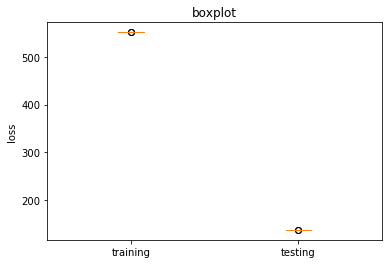

In [11]:
# build labels
ylabels = np.zeros(y.shape)
ylabels[np.where(y<=1)] = 0
ylabels[np.where(y>1)] = 1

# parameters
arg_lr = dict()
arg_lr['method'] = 'lr'
arg_lr['loss'] = 'loglikelihood'
arg_lr['degree'] = 3
arg_lr['k_fold'] = 5
arg_lr['max_iters'] = 50
arg_lr['initial_w'] = np.zeros(phi.shape[1])
arg_lr['method_minimization'] = 'newton' # 'gd' (gradient_descent) or 'newton'
arg_lr['gamma'] = 1e-4

# cross validation
w_tr_tot, loss_tr_tot, loss_te_tot = cross_validation(ylabels, phi, arg_lr)

# optimal weights minimize the testing error
w_opt = w_tr_tot[np.argmin(loss_te_tot)]

# plot training and testing losses 
plt.figure
plt.boxplot(np.column_stack((np.array(loss_tr_tot), np.array(loss_te_tot))), labels=['training','testing'])
plt.ylabel('loss')
plt.title('boxplot')
plt.show()

# Test the regularized logistic regression

In [ ]:
# build labels
ylabels = np.zeros(y.shape)
ylabels[np.where(y<=1)] = 0
ylabels[np.where(y>1)] = 1

# parameters
arg_lrr = dict()
arg_lrr['method'] = 'lrr'
arg_lrr['loss'] = 'loglikelihood'
arg_lrr['k_fold'] = 5
arg_lrr['max_iters'] = 50
arg_lrr['initial_w'] = np.zeros(phi.shape[1])
arg_lrr['method_minimization'] = 'newton' # 'gd' (gradient_descent) or 'newton'
arg_lrr['gamma'] = 1e-4
arg_lrr['lambda_'] = 10

# cross validation
w_tr_tot, loss_tr_tot, loss_te_tot = cross_validation(ylabels, phi, arg_lrr)

# optimal weights minimize the testing error
w_opt = w_tr_tot[np.argmin(loss_te_tot)]

# plot training and testing losses 
plt.figure
plt.boxplot(np.column_stack((np.array(loss_tr_tot), np.array(loss_te_tot))), labels=['training','testing'])
plt.ylabel('loss')
plt.title('boxplot')
plt.show()